In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [93]:
class Packet():
    def __init__(self, summation: int, length: int):
        temp = np.ones(length) / length
        self.packets = np.random.multinomial(summation, temp, size=1)[0]

In [94]:
class Queue():
    def __init__(self):
        self.length = 0
        self.packets = []
    def enqueue(self, enter_t: int):
        self.length += 1
        self.packets.append(enter_t)
    def dequeue(self):
        self.length -= 1
        self.packets.pop(0)
    def get_enter_t(self):
        return self.packets[0]

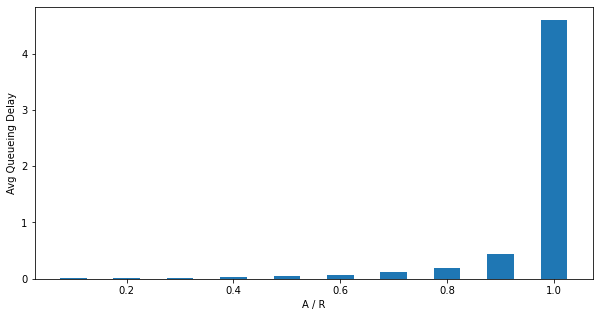

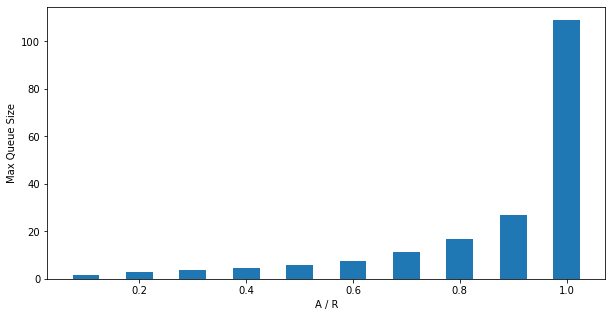

In [126]:
As = np.arange(1, 11)
R = 10
t = 1000
avg_qd = []
avg_max_size = []

for A in As:
    num_packet = A * t
    delays = []
    max_sizes = []
    for _ in range(10):
        curr_t = 0
        max_size = 0
        delay = []
        p = Packet(num_packet, t * 10)
        q = Queue()
        for curr_t in range(len(p.packets)):
            while p.packets[curr_t] != 0:
                q.enqueue(curr_t) 
                p.packets[curr_t] -= 1
            if q.length > 0:
                delay.append((curr_t - q.get_enter_t()) / 10)
                q.dequeue()
            if max_size < q.length:
                max_size = q.length
        delays.append(np.mean(np.array(delay)))
        max_sizes.append(max_size)
    avg_qd.append(np.mean(np.array(delays)))
    avg_max_size.append(np.mean(np.array(max_sizes)))
    delays = np.array(delays)
    delays.sort()
plt.figure(figsize=(10, 5))
plt.bar(As / R, np.array(avg_qd), width=0.05)
plt.xlabel("A / R")
plt.ylabel("Avg Queueing Delay")
plt.figure(figsize=(10, 5))
plt.xlabel("A / R")
plt.ylabel("Max Queue Size")
plt.bar(As / R, np.array(avg_max_size), width=0.05)
plt.show()